In [1]:
#importing necessary libraries for face recognition project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.feature import hog
from skimage import data, exposure
import cv2
from matplotlib import cm
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from scipy.spatial import distance
import matplotlib.lines as mlines
from matplotlib.patches import Polygon





In [16]:
# importing martin garrix image and coverting that image from BGR to RGB
image = cv2.imread("martin garrix.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


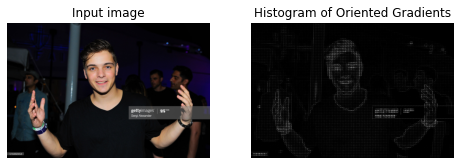

In [17]:
# Creating a GrayScale Image of Martin Garrix
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()





In [18]:
# No of pixels in the above image
len(fd)

87040

In [19]:
#Dimensions of Image
image.shape

(1363, 2048, 3)

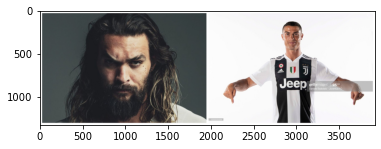

In [6]:
# Importing image of both ronaldo and jason momoa in one and again converting it from BGR to RGB
image = cv2.imread('momoa_ronaldo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [7]:
# to find out the number of faces in given imae(we can input any image of our choice)
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Number of faces in input image is", number_of_faces)

Number of faces in input image is 2


A face is located at pixel location:  650 428 1315 1094
A face is located at pixel location:  2817 217 3040 440


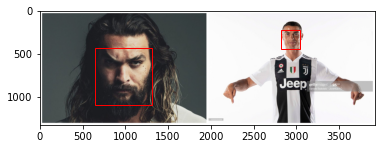

In [8]:
plt.imshow(image)
ax = plt.gca()

# for any number of input images we here get the pixel location of face in given picture
for face_location in face_locations:
    
    #print the location of each image with the set of coordinates 
    top, right, bottom, left = face_location
    x,y,w,h = left, top, right, bottom
    print("A face is located at pixel location: ", x,y,w,h)
    
    # making box around picture
    rect = Rectangle((x, y), w-x, h-y, fill=False, color='red')
    ax.add_patch(rect)
    
plt.show()
    


In [9]:
# creating face demo image(Martin Garrix) and other two test images
image = cv2.imread('face_demo.jpg')
face_demo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('jason momoa.jpg')
momoa = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('ronaldo.jpg')
ronaldo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)





In [10]:
face_demo_encoding = face_recognition.face_encodings(face_demo)[0]
momoa_encoding = face_recognition.face_encodings(momoa)[0]
ronaldo_encoding = face_recognition.face_encodings(ronaldo)[0]

#create database of all known face encodings

known_face_encodings = [
    face_demo_encoding,
    momoa_encoding,
    ronaldo_encoding
]

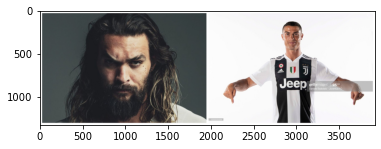

In [11]:
# unknown image we wish to check
image = cv2.imread('momoa_ronaldo.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(unknown_image)

# we get face encodings for any face in the picture 
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [12]:
# there might be various faces in one picture so we need a lop for it
##so we test here if givien unknown face matches with three people we know

for unknown_face_encoding in unknown_face_encodings:
    results = []
    ### here we calculate euclidean distance
    for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding, unknown_face_encoding)
        results.append(d)
    threshold=0.6,
    results = np.array(results) <= threshold

    name = "Unknown"

    if results[0]:
        name = "Face demo image"
    if results[1]:
        name = "Jason Momoa"
    if results[2]:
        name = " Cristano Ronaldo"
    
    print(f"Found in the photo: ", name)



Found in the photo:  Jason Momoa
Found in the photo:   Cristano Ronaldo


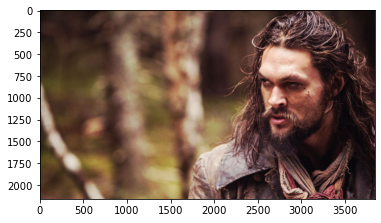

In [13]:
#load image for facial features
image = cv2.imread('jason momoa.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [14]:
#finding facial features in the given image
face_landmarks_list = face_recognition.face_landmarks(image)

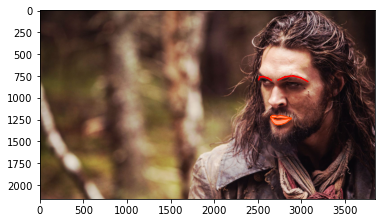

In [15]:
plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
    #the face landmark detection system gives us following: chin, left_eyebrow, right_eyebrow, nose_bridge, nose_tip, left_eye,
    ##right eye, top_lip, bottom_lip
    
    left_eyebrow_pts = face_landmarks['left_eyebrow']
    pre_x,pre_y = left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
        l = mlines.Line2D([pre_x,x], [pre_y,y], color="red")
        ax.add_line(l)
        pre_x,pre_y = x,y
    
    right_eyebrow_pts = face_landmarks['right_eyebrow']
    pre_x,pre_y = right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
        l = mlines.Line2D([pre_x,x], [pre_y,y], color="red")
        ax.add_line(l)
        pre_x,pre_y = x,y
        
    p = Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    
plt.show()
    